In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/simulated_bracket.csv")

In [4]:
del df["Unnamed: 0"]

In [5]:
df

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins
0,2025,Florida,1,West,2.792968,6,5
1,2025,Houston,1,Midwest,3.750173,5,4
2,2025,Duke,1,East,3.805286,4,6
3,2025,Auburn,1,South,2.388936,4,4
4,2025,Alabama,2,East,1.765591,3,3
...,...,...,...,...,...,...,...
811,2013,New Mexico St.,13,Midwest,0.380072,0,0
812,2013,Missouri,9,Midwest,1.098171,0,0
813,2013,Middle Tennessee,11,Midwest,0.547498,0,0
814,2013,Liberty,16,Midwest,0.048884,0,0


In [6]:
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024, 2025]

In [21]:
def bracket_check(df, years):  
    
    scores = []

    for year in years:

        score = 0

        score = score + (10 * (len(df[(df["Year"] == year) & (df["Wins"] > 0) & (df["Sim_Wins"] > 0)])))
        score = score + (20 * (len(df[(df["Year"] == year) & (df["Wins"] > 1) & (df["Sim_Wins"] > 1)])))
        score = score + (40 * (len(df[(df["Year"] == year) & (df["Wins"] > 2) & (df["Sim_Wins"] > 2)])))
        score = score + (80 * (len(df[(df["Year"] == year) & (df["Wins"] > 3) & (df["Sim_Wins"] > 3)])))
        score = score + (160 * (len(df[(df["Year"] == year) & (df["Wins"] > 4) & (df["Sim_Wins"] > 4)])))
        score = score + (320 * (len(df[(df["Year"] == year) & (df["Wins"] > 5) & (df["Sim_Wins"] > 5)])))

        scores.append(score)

    x = np.arange(len(years))

    plt.figure(figsize=(12, 5))

    plt.bar(x, scores, color='g', label='Score')

    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.xticks(x, years)
    for i, score in enumerate(scores):
               plt.text(i, score, str(score), ha='center', va='bottom') 

    plt.show()
    
    avg = sum(scores) / len(scores)

    print("Average:", round(avg, 3))



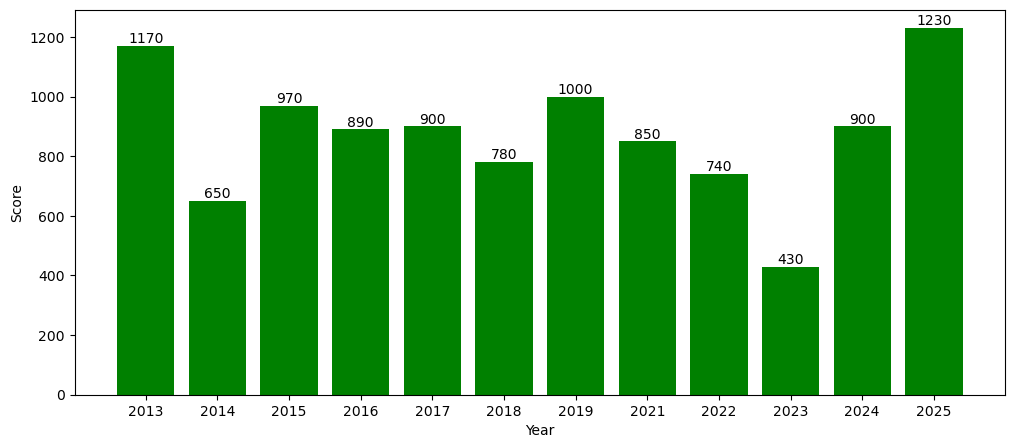

Average: 875.833


In [22]:
bracket_check(df, years)